In [1]:
import cv2

participant_number = '3'
video_path = f"./data/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [2]:
from frame import Frame
from typing import List

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()

In [3]:
%load_ext autoreload
%autoreload 2
from face_analyzer import FaceAnalyzer
import random

face_analyzer = FaceAnalyzer()
frames_selection = random.sample(frames, 20)

# Face

In [4]:
for frame in frames_selection:
    frame.face = face_analyzer.get_face(frame.image)

# Smile

In [5]:
for frame in frames_selection:
    frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

In [6]:
for frame in frames_selection:
    frame.face_interest_points = face_analyzer.get_face_interest_points(frame)

# Display Frames

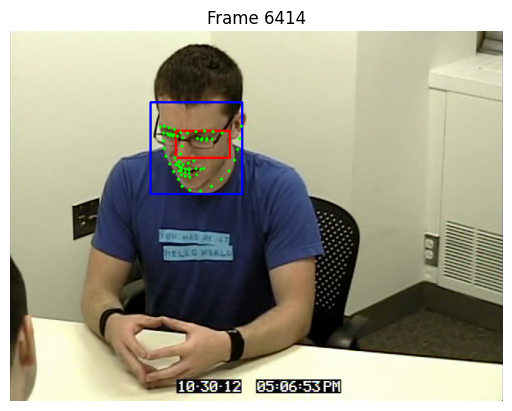

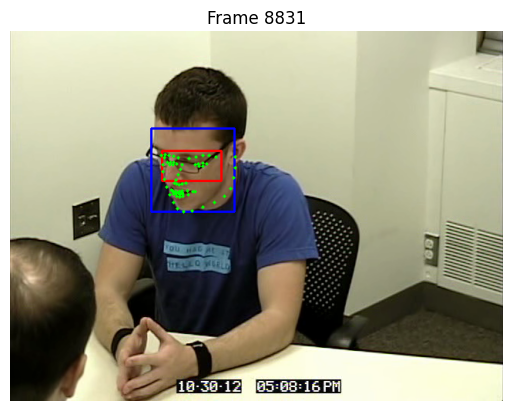

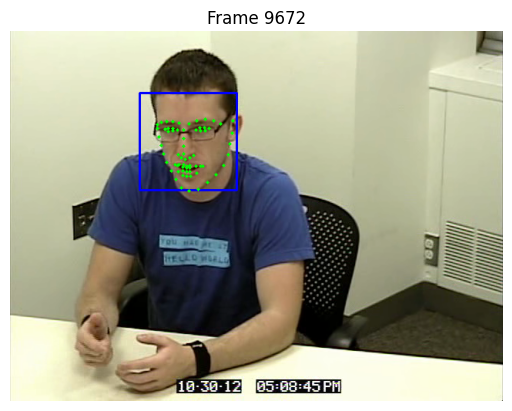

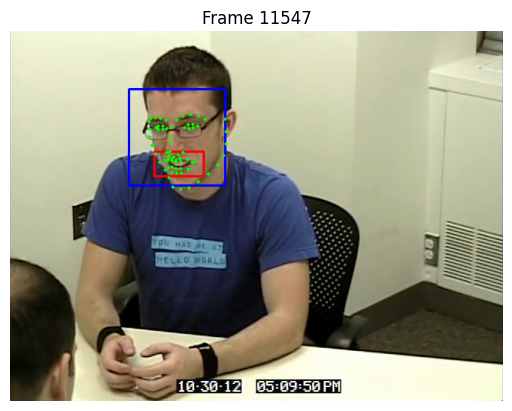

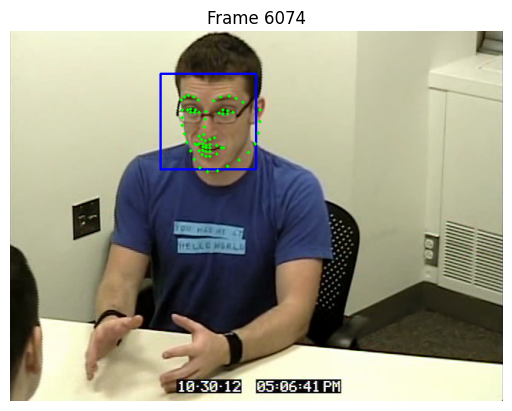

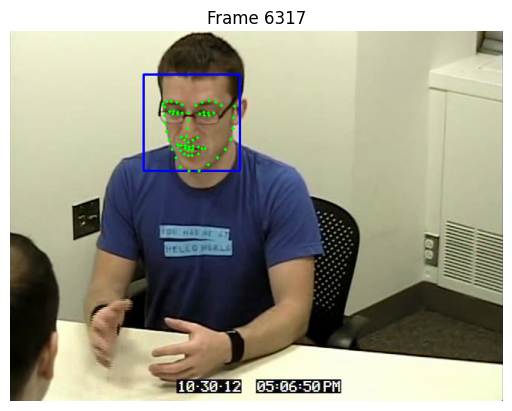

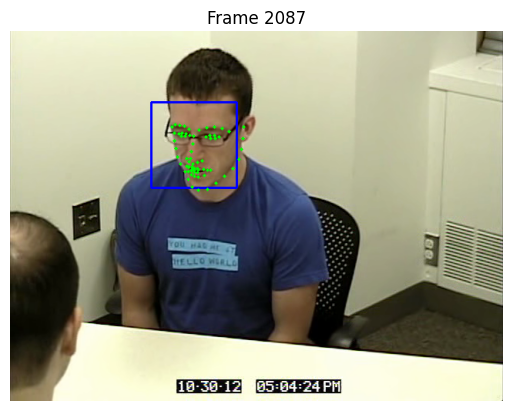

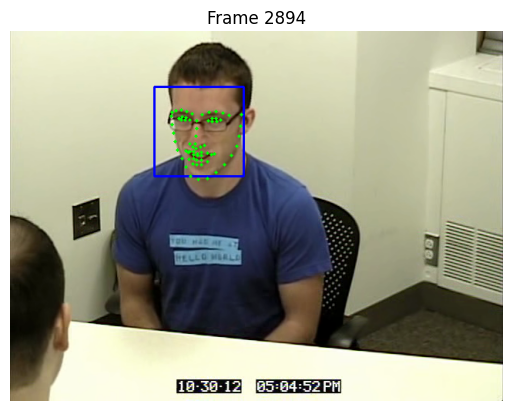

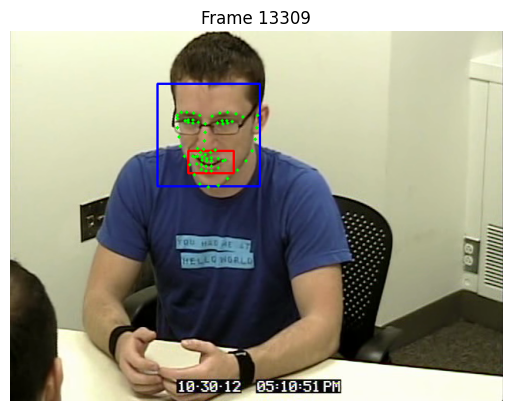

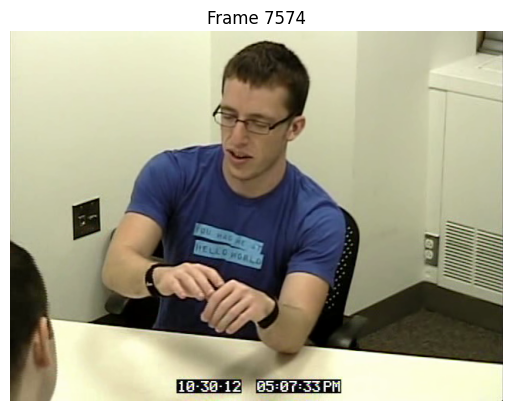

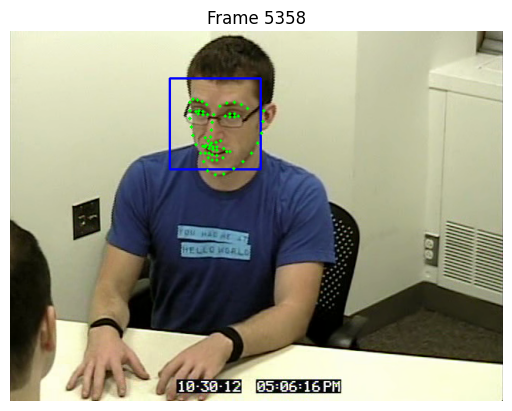

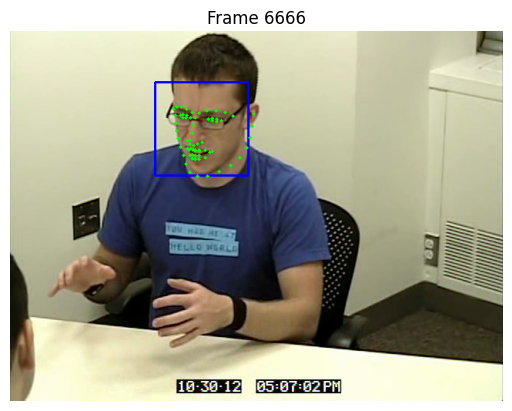

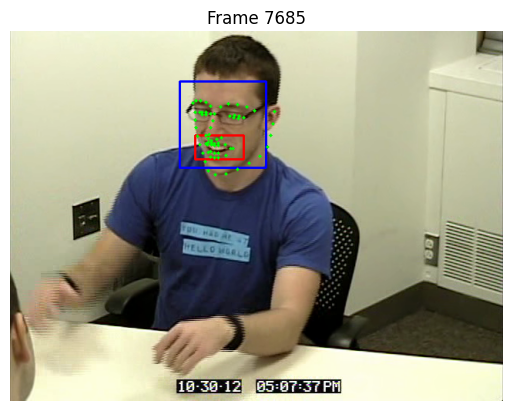

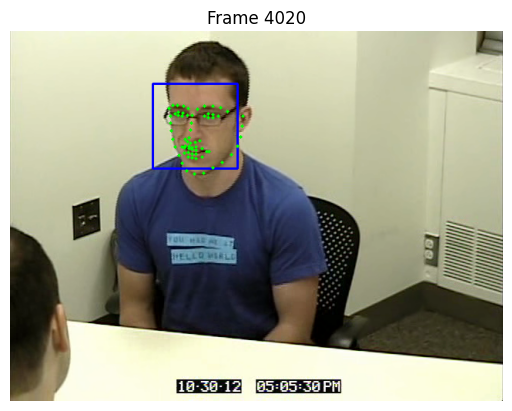

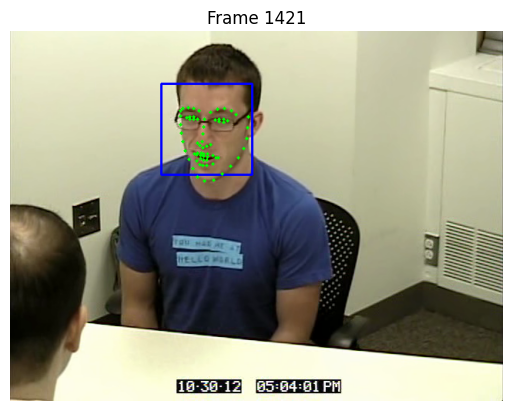

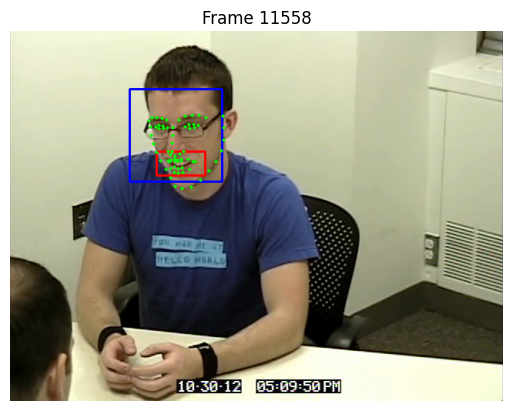

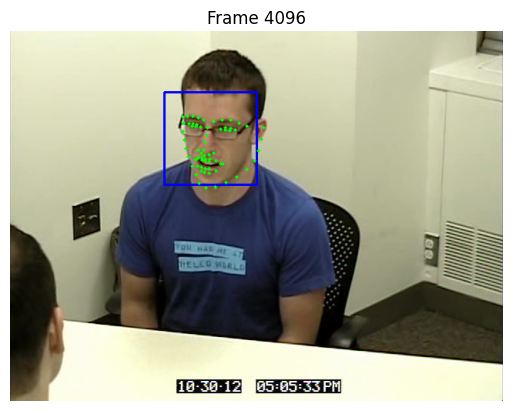

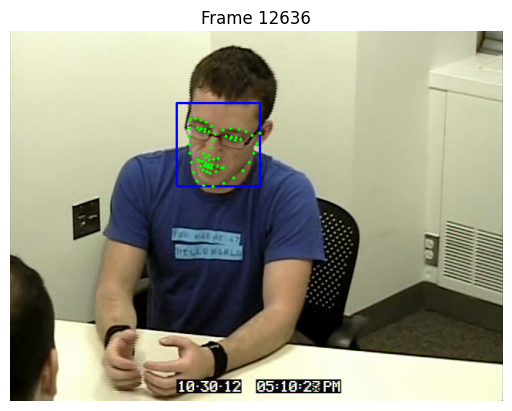

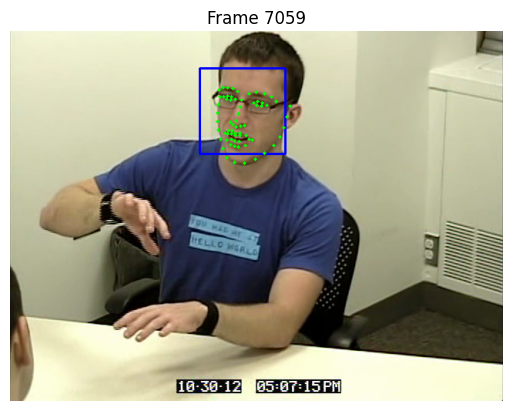

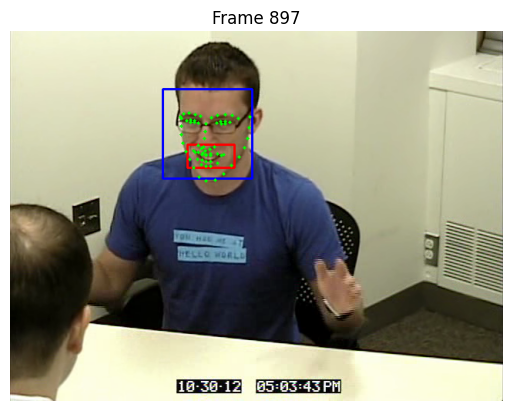

In [7]:
for frame in frames_selection:
    frame.create_drawable_image_copy()
    frame.draw_face()
    frame.draw_smile()
    frame.draw_facial_landmarks()
    frame.display()

# Eyebrows

In [ ]:
from eye_brows import EyeBrows

for frame in frames_selection:
    if frame.face_interest_points is not None:
        brow: EyeBrows = face_analyzer.get_eyebrows_coordinates(frame.face_interest_points)
        print(brow.innerBrowLeft)

[221 131]
[218 164]
[219 119]
[202 115]
[244  89]
[223  95]
[232 127]
[236 107]
[246 109]
[255  95]
[236 105]
[260  97]
[231 100]
[245 103]
[203 115]
[251 115]
[261 123]
[295  78]
[247 110]
